In [35]:
testasTestast = "These features are then enhanced with features from the bottom-up pathway via lateral connections."

In [36]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

In [37]:
inputs = processor(text=testasTestast, return_tensors="pt")

In [38]:
from datasets import load_dataset

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")

import torch

speaker_embeddings = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

In [39]:
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)

In [40]:
from transformers import SpeechT5HifiGan

vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

In [41]:
speech = model.generate_speech(inputs["input_ids"], speaker_embeddings, vocoder=vocoder)

In [42]:
speech

tensor([-2.0413e-04, -7.5736e-06, -2.2809e-05,  ...,  2.7820e-04,
         5.1493e-04,  5.8895e-04])

In [43]:
from IPython.display import Audio

Audio(speech, rate=16000)

In [44]:
from transformers import VitsModel, AutoTokenizer
import torch

model = VitsModel.from_pretrained("facebook/mms-tts-eng")
tokenizer = AutoTokenizer.from_pretrained("facebook/mms-tts-eng")

text = testasTestast
inputs = tokenizer(text, return_tensors="pt")

with torch.no_grad():
    output = model(**inputs).waveform

from IPython.display import Audio

Audio(output, rate=16000)


Some weights of the model checkpoint at facebook/mms-tts-eng were not used when initializing VitsModel: ['flow.flows.0.wavenet.in_layers.0.weight_g', 'flow.flows.0.wavenet.in_layers.0.weight_v', 'flow.flows.0.wavenet.in_layers.1.weight_g', 'flow.flows.0.wavenet.in_layers.1.weight_v', 'flow.flows.0.wavenet.in_layers.2.weight_g', 'flow.flows.0.wavenet.in_layers.2.weight_v', 'flow.flows.0.wavenet.in_layers.3.weight_g', 'flow.flows.0.wavenet.in_layers.3.weight_v', 'flow.flows.0.wavenet.res_skip_layers.0.weight_g', 'flow.flows.0.wavenet.res_skip_layers.0.weight_v', 'flow.flows.0.wavenet.res_skip_layers.1.weight_g', 'flow.flows.0.wavenet.res_skip_layers.1.weight_v', 'flow.flows.0.wavenet.res_skip_layers.2.weight_g', 'flow.flows.0.wavenet.res_skip_layers.2.weight_v', 'flow.flows.0.wavenet.res_skip_layers.3.weight_g', 'flow.flows.0.wavenet.res_skip_layers.3.weight_v', 'flow.flows.1.wavenet.in_layers.0.weight_g', 'flow.flows.1.wavenet.in_layers.0.weight_v', 'flow.flows.1.wavenet.in_layers.1.wei

In [45]:
speech.shape

torch.Size([102912])

In [46]:
output.shape

torch.Size([1, 114176])

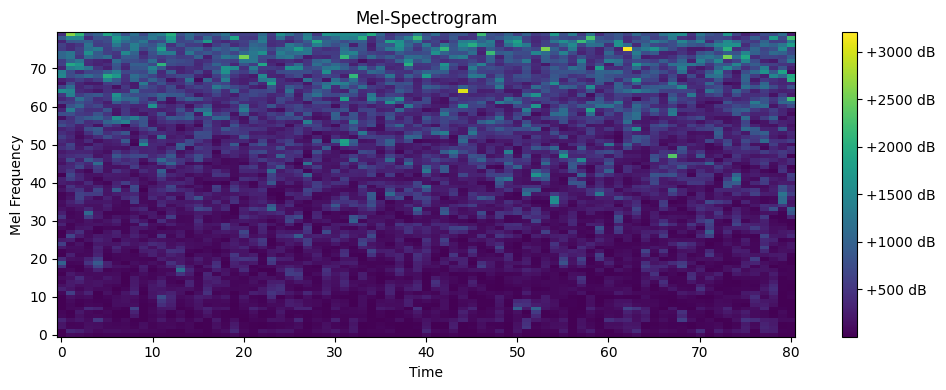

In [62]:
import torchaudio.transforms as transforms
import torch
import matplotlib.pyplot as plt

# Example text-to-sequence preprocessing
def text_to_sequence(text, text_processor):
    return text_processor(text)

# Example audio-to-Mel-spectrogram preprocessing
def audio_to_mel_spectrogram(audio, sample_rate):
    transform = transforms.MelSpectrogram(sample_rate=sample_rate, n_mels=80)
    return transform(audio)



# Generate Mel-spectrogram
mel_spectrogram = audio_to_mel_spectrogram(output, 16000)

# Convert to NumPy for plotting
mel_spectrogram_np = mel_spectrogram.squeeze().detach().cpu().numpy()

# Plotting the Mel-spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(mel_spectrogram_np, aspect='auto', origin='lower', interpolation='none')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.tight_layout()

In [47]:
# Iterate through the test dataset
for input, ground_truth in test_dataset:
    # Get the model's output
    output = model(input)

    # Convert tensors to numpy arrays if necessary
    if isinstance(output, torch.Tensor):
        output = output.detach().cpu().numpy()
    if isinstance(ground_truth, torch.Tensor):
        ground_truth = ground_truth.detach().cpu().numpy()

    # Calculate the STOI score between the output and ground truth
    score = stoi(ground_truth, output, 16000)  # Assuming a sample rate of 16kHz
    stoi_scores.append(score)

# Calculate the average STOI score
average_stoi = sum(stoi_scores) / len(stoi_scores)
print(f"Average STOI Score: {average_stoi}")

NameError: name 'test_dataset' is not defined